## Welcome to the Browser Wars (1995 - )
<p><img src="https://assets.datacamp.com/production/project_1172/img/browser.png" alt="Browser on desktop, tablet, and phone"></p>
<p>In the mid 1990s, the First Browser War began with Netscape Navigator and Microsoft Internet Explorer fighting for dominance. By 2001, Internet Explorer was the clear winner, but it was not long before the Second Browser Wars began (2004-2017). This coincided with the rise of smartphones, which emphasized the need and competitiveness for more mobile-friendly versions of browsers. <a href="https://en.wikipedia.org/wiki/Browser_wars">[1]</a></p>
<p>In this notebook, we'll analyze the worldwide popularity of browsers over time using Google Trends. Although this won't give us direct market share figures, we can use Google Trends to get a sense of interest of a given browser over time and how that interest compares to other browsers. In particular, we will be looking at five major players over the past two decades: Mozilla Firefox (2002-), Apple's Safari (2002-), Google Chrome (2008-), Microsoft Internet Explorer (1995-2020), and Opera (1995-).</p>
<p>The dataset you will use was downloaded as a CSV from this <a href="https://trends.google.com/trends/explore?date=all&q=%2Fm%2F01dyhm,%2Fm%2F0168s_,%2Fm%2F04j7cyf,%2Fm%2F03xw0,%2Fm%2F01z7gs">Google Trends query</a> in mid-October of 2020. Here are the details:</p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/worldwide_browser_trends.csv</b></div>
This is a time series indexed by month with the search interest for each browser.
<ul>
    <li><b>Month:</b> each month from 2004-01 to 2020-10</li>
    <li><b>Firefox:</b> search interest for Firefox</li>
    <li><b>Safari:</b> search interest for Safari</li>
    <li><b>Google Chrome:</b> search interest for Chrome</li>
    <li><b>Internet Explorer:</b> search interest for Internet Explorer</li>
    <li><b>Opera:</b> search interest for Opera</li>
</ul>
</div>
<p>Google defines the values of search interest as:</p>
<blockquote>
  <p>Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.</p>
</blockquote>
<p>Best of luck and may the best browser win!</p>

In [137]:
# Use this cell to begin your analysis, and add as many as you would like!

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/worldwide_browser_trends.csv', 
                 parse_dates=['Month'], 
                 index_col='Month')
df.head()

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2004-01-01,12,2,2,37,9
2004-02-01,20,2,2,39,9
2004-03-01,18,2,2,34,8
2004-04-01,20,2,2,33,9
2004-05-01,20,2,2,35,9


In [139]:
#Task 1
#---------
#Display the first few rows of the original DataFrame for verification
print("Original DataFrame:")
print(df.head())

#Calculate the six-month rolling average for each browser
rolling_six = df.rolling(window=6).mean()

#Display the rolling six-month averages
print("\nRolling Six-Month Averages:")
print(rolling_six.head(10)) 

quarterly_pct_change = df.pct_change(periods=3) * 100 

print("\nQuarterly Percentage Change (%):")
print(quarterly_pct_change.head(10))  


chrome_trends = pd.DataFrame()

for year in df.index.year.unique():
    chrome_trends[year] = df[df.index.year == year]['Google Chrome']

print("\nChrome Trends DataFrame:")
print(chrome_trends.head(10)) 

rolling_six.plot(title="6 Month Rolling Average of Browser Trends")
plt.xlabel("Date") 
plt.ylabel("Rolling Average Search Interest") 
plt.legend(title="Browsers")  
plt.show()  # Show the plot

Original DataFrame:
            Firefox  Safari  Google Chrome  Internet Explorer  Opera
Month                                                               
2004-01-01       12       2              2                 37      9
2004-02-01       20       2              2                 39      9
2004-03-01       18       2              2                 34      8
2004-04-01       20       2              2                 33      9
2004-05-01       20       2              2                 35      9

Rolling Six-Month Averages:
              Firefox  Safari  Google Chrome  Internet Explorer     Opera
Month                                                                    
2004-01-01        NaN     NaN            NaN                NaN       NaN
2004-02-01        NaN     NaN            NaN                NaN       NaN
2004-03-01        NaN     NaN            NaN                NaN       NaN
2004-04-01        NaN     NaN            NaN                NaN       NaN
2004-05-01        NaN   


Quarterly Percentage Change (%):
              Firefox     Safari  Google Chrome  Internet Explorer      Opera
Month                                                                        
2009-01-01   4.545455  25.000000       0.000000           9.090909   0.000000
2009-02-01  -1.515152  20.000000       0.000000           9.090909  -9.090909
2009-03-01  -7.042254  40.000000     -13.333333          20.000000  -8.333333
2009-04-01  -7.246377   0.000000      23.076923          20.833333  -9.090909
2009-05-01  -6.153846 -16.666667      25.000000           8.333333   0.000000
2009-06-01  -6.060606   0.000000      15.384615         -16.666667  -9.090909
2009-07-01  14.062500  20.000000      12.500000          -6.896552   0.000000
2009-08-01  18.032787   0.000000      20.000000           0.000000  10.000000
2009-09-01   8.064516 -14.285714      33.333333          -4.000000  30.000000
2009-10-01  -9.589041 -16.666667      16.666667         -14.814815  10.000000


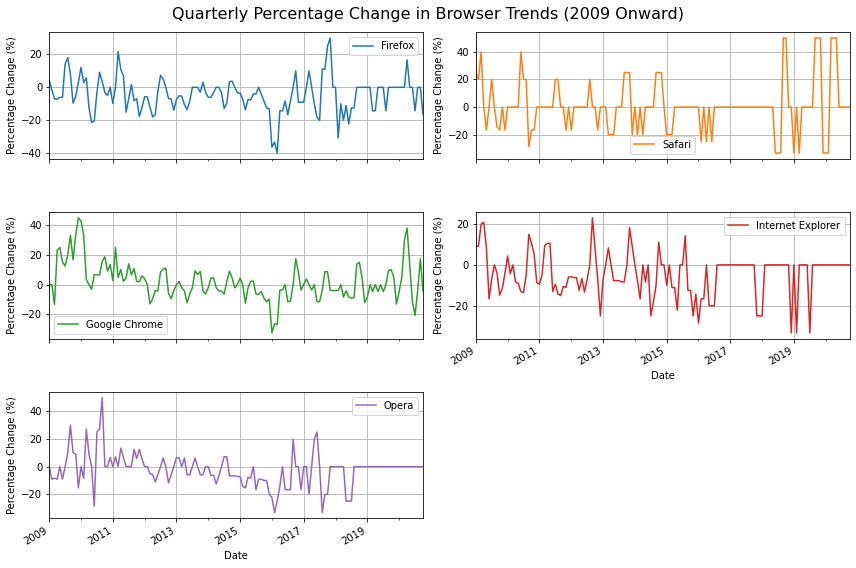

In [140]:
#Task 2
#---------
#Calculate the quarterly percentage change
pct_change_quarterly = df.pct_change(periods=3) * 100

#Filter to include only dates from 2009 onward
pct_change_quarterly = pct_change_quarterly[pct_change_quarterly.index >= '2009-01-01']

print("\nQuarterly Percentage Change (%):")
print(pct_change_quarterly.head(10)) 

ax = pct_change_quarterly.plot(subplots=True, figsize=(12, 8), layout=(3, 2), title="Quarterly Percentage Change in Browser Trends")
plt.suptitle("Quarterly Percentage Change in Browser Trends (2009 Onward)", fontsize=16)  # Main title for the entire figure

# Adding labels to each subplot
for axis in ax.flatten():
    axis.set_xlabel('Date') 
    axis.set_ylabel('Percentage Change (%)')  
    axis.grid() 

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

              Firefox     Safari  Google Chrome  Internet Explorer      Opera
Month                                                                        
2009-01-01   4.545455  25.000000       0.000000           9.090909   0.000000
2009-02-01  -1.515152  20.000000       0.000000           9.090909  -9.090909
2009-03-01  -7.042254  40.000000     -13.333333          20.000000  -8.333333
2009-04-01  -7.246377   0.000000      23.076923          20.833333  -9.090909
2009-05-01  -6.153846 -16.666667      25.000000           8.333333   0.000000
2009-06-01  -6.060606   0.000000      15.384615         -16.666667  -9.090909
2009-07-01  14.062500  20.000000      12.500000          -6.896552   0.000000
2009-08-01  18.032787   0.000000      20.000000           0.000000  10.000000
2009-09-01   8.064516 -14.285714      33.333333          -4.000000  30.000000
2009-10-01  -9.589041 -16.666667      16.666667         -14.814815  10.000000


<Figure size 720x432 with 0 Axes>

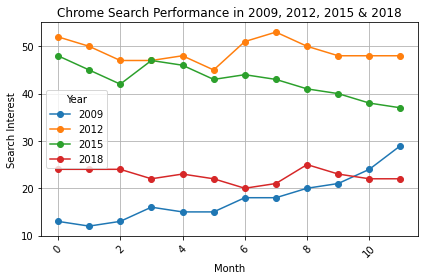

In [141]:
#Task 3
#-----------
#Create a new DataFrame that has a column for each year and a row for each month
chrome_trends = pd.DataFrame()

#Pull the data for each year and add it to the DataFrame
for year in ['2009', '2012', '2015', '2018']:
    chrome_trends_per_year = df.loc[year, ['Google Chrome']].reset_index(drop=True)
    chrome_trends_per_year.rename(columns={'Google Chrome': year}, inplace=True)
    chrome_trends = pd.concat([chrome_trends, chrome_trends_per_year], axis=1)

print(pct_change_quarterly.head(10))

plt.figure(figsize=(10, 6))
chrome_trends.plot(title="Chrome Search Performance in 2009, 2012, 2015 & 2018", marker='o')
plt.xlabel('Month')
plt.ylabel('Search Interest')
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.grid()
plt.legend(title='Year')  # Adding a legend title for clarity
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()